<a href="https://colab.research.google.com/github/Jit562/Deep-Learning-Projects/blob/main/Spam_Email_Prediction_ANN_And_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projects Name:-** Span Email Prediction.
# **Summary**

This project aims to predict the Span of Emial Span (malignant or benign) using various features computed. These features describe the characteristics of the Span or Not Span. The dataset used is the Email Span Dataset, which contains 5572 instances and 2 attributes, including the Span.

### **Objectives**

1. Data Cleaning and Preprocessing:

2. Handle any missing values in the dataset.

3. Remove irrelevant columns that do not contribute to the predictive modeling.

4. Encode categorical data into numerical values for model compatibility.

5. Scale the features to ensure equal contribution to the model.

###**Exploratory Data Analysis (EDA):**

1. Analyze the relationships between features and the target variable.

2. Identify important features for the prediction task.

### **Model Building:**

* Build and evaluate various Deep learning models to predict Email Span.
### **Model Evaluation:**

* Assess the accuracy and performance of the models using appropriate metrics. Interpret the results to provide insights into the model's predictions.
### **Conclusion:**

* Summarize the findings of the analysis.

* Discuss the implications of the results for Span Email.
* These objectives guide the project through a structured approach to building a robust predictive model for Email Span.

## Import Dependency

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model, model_from_json
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
#Load the dataset
df = pd.read_csv('/content/drive/MyDrive/mail_data.csv')

In [3]:
#top 5 data check
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#check the shape
df.shape

(5572, 2)

In [5]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
#check the null values
df.isnull().sum()

,0
Category,0
Message,0


In [7]:
#Duplicated
df.duplicated().sum()

415

In [8]:
#Drop duplicate
df.drop_duplicates(inplace=True)

In [9]:
#Duplicate
df.duplicated().sum()

0

In [10]:
#columns check
df.columns

Index(['Category', 'Message'], dtype='object')

In [11]:
#check the target data
df['Category'].value_counts()

,count
Category,
ham,4516
spam,641


In [12]:
## Import Library for clean data set
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.stem.porter import PorterStemmer
import string,time
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
# Data Clean example = sweet to sweets , or go --> goes same world convert only one world using this method
port_stem = PorterStemmer()

In [14]:
# Data Cleaning using Regular expression
def clean_text(text):
  text = re.sub(r'@\w+|https?://\S+|[^A-Za-z0-9\s]', '', text) #Remove URL and Email_id
  text = re.sub(r'[\r\n]+', ' ', text) #Remove special char
  text = re.sub(r'[^a-zA-Z]', ' ', text) # Remove any another char
  clean = re.compile('<.*?>') #remove HTML tag
  text = clean.sub(r'', text)

  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

  text = emoji_pattern.sub(r'', text) # Remove Emoji

  text = text.lower() # Set the all char in lower
  text = text.split() # Split the char
  text = [port_stem.stem(word) for word in text if not word in stopwords.words('english')] #Remove stop word

  text = ' '.join(text) # Join the char

  return text

In [15]:
#Apply the clean function
df['Message'] = df['Message'].apply(lambda x: clean_text(x))

In [16]:
#Remove Punctuation
panch_word = string.punctuation
def remove_punch(text):
  for punch in panch_word:
    text = text.replace(punch,'')
  return text

In [17]:
#Apply punctuation method
df['Message'] = df['Message'].apply(lambda x: remove_punch(x))

In [18]:
df.head()

,Category,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though


In [19]:
#Apply label encoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [20]:
df.head()

,Category,Message
0,0,go jurong point crazi avail bugi n great world...
1,0,ok lar joke wif u oni
2,1,free entri wkli comp win fa cup final tkt st m...
3,0,u dun say earli hor u c alreadi say
4,0,nah dont think goe usf live around though


In [21]:
df['Category'].value_counts()

,count
Category,
0,4516
1,641


In [24]:
## Feature extraction
x = df['Message']
y = df['Category']

In [25]:
## Use tfidf vectore
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(x)

In [26]:
#handle imblance data
smote = SMOTE()
x, y = smote.fit_resample(x, y)
print(x.shape, y.shape)

(9032, 7061) (9032,)


In [27]:
y.value_counts()

,count
Category,
0,4516
1,4516


In [28]:
#Split the data for model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### **logistic Regression**

In [29]:
#Apply model
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_t = lr.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_t))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9856115107913669
0.9882352941176471
[[878  13]
 [ 13 903]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       891
           1       0.99      0.99      0.99       916

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



### **KNN**

In [30]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
y_pred_t = knn.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_t))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9933591588267847
0.9965397923875432
[[886   5]
 [  7 909]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       891
           1       0.99      0.99      0.99       916

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



### **DecisionTreeClassifier**

In [31]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
y_pred_t = dt.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_t))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9629219701162147
1.0
[[847  44]
 [ 23 893]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       891
           1       0.95      0.97      0.96       916

    accuracy                           0.96      1807
   macro avg       0.96      0.96      0.96      1807
weighted avg       0.96      0.96      0.96      1807



### **RandomForestClassifier**

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred_t = rf.predict(x_train)
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_t))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.991698948533481
1.0
[[890   1]
 [ 14 902]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       891
           1       1.00      0.98      0.99       916

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



### **GaussianNB**

In [35]:
gb = GaussianNB()
gb.fit(x_train.toarray(),y_train)
y_pred = gb.predict(x_test.toarray())
y_pred_t = gb.predict(x_train.toarray())
print(accuracy_score(y_test, y_pred))
print(accuracy_score(y_train, y_pred_t))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9313779745434422
0.9547404844290658
[[767 124]
 [  0 916]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.93       891
           1       0.88      1.00      0.94       916

    accuracy                           0.93      1807
   macro avg       0.94      0.93      0.93      1807
weighted avg       0.94      0.93      0.93      1807



## **Deep Learning Model**

### **ANN**

In [53]:
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [54]:
#Fit the model
history = model.fit(x_train, y_train, epochs=5,
                    batch_size=32, validation_split=0.15,
                    verbose=1,
                    validation_data = (x_test, y_test))

Epoch 1/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8999 - loss: 0.0000e+00 - val_accuracy: 0.9026 - val_loss: 0.0000e+00
Epoch 2/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9945 - loss: 0.0000e+00 - val_accuracy: 0.9784 - val_loss: 0.0000e+00
Epoch 3/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9965 - loss: 0.0000e+00 - val_accuracy: 0.9983 - val_loss: 0.0000e+00
Epoch 4/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9951 - loss: 0.0000e+00 - val_accuracy: 0.9994 - val_loss: 0.0000e+00
Epoch 5/5
226/226 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9897 - loss: 0.0000e+00 - val_accuracy: 0.9956 - val_loss: 0.0000e+00


In [55]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 128)                 │         903,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,744,709 (10.47 MB)

 Trainable params: 914,753 (3.49 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,829,508 (6.98 MB)

In [56]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 0.9955727458000183


In [57]:
#predict the model
y_pred = model.predict(x_test)
y_pred = np.where(y_pred > 0.5,1,0)

#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

#Calsification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Accuracy: 0.9955727725511898
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       891
           1       1.00      1.00      1.00       916

    accuracy                           1.00      1807
   macro avg       1.00      1.00      1.00      1807
weighted avg       1.00      1.00      1.00      1807



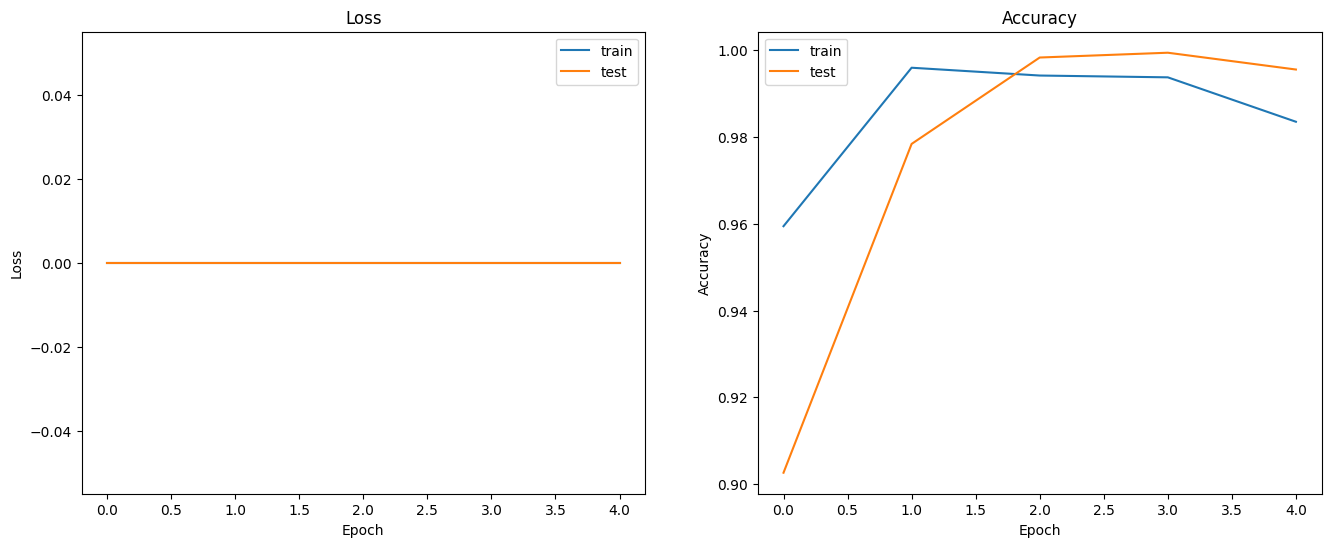

In [58]:
#Show the plot
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Conclusion**

In this project, we developed a predictive model for Email span diagnosis using the Email span Wisconsin (Diagnostic) Dataset. Key steps included data cleaning, encoding categorical data, feature scaling, and exploratory data analysis. We built and evaluated various machine learning model and Deep learning models, with Logistica Regresssion, KNN, Naibe Base, Random Forest and ANN achieving the highest performance of the model Logistic Regression , KNN and ANN.